In [2]:
from pandas import read_csv, DataFrame
import statsmodels.api as sm
from statsmodels.iolib.table import SimpleTable
from sklearn.metrics import r2_score
#import ml_metrics as metrics

dataset = read_csv('GOOGL.csv',',', index_col=['Date'], parse_dates=['Date'], dayfirst=True)
dataset.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-03-11,739.950012,744.900024,736.700012,744.869995,744.869995,1769000
2016-03-14,744.969971,754.260010,743.659973,750.239990,750.239990,1641200
2016-03-15,746.020020,753.010010,742.840027,750.570007,750.570007,1491600
2016-03-16,749.049988,759.000000,746.500000,757.359985,757.359985,1465300
2016-03-17,757.650024,765.340027,757.359985,758.479980,758.479980,2228200


In [10]:
otg = dataset['Adj Close']
otg.head()

Date
2016-03-11    744.869995
2016-03-14    750.239990
2016-03-15    750.570007
2016-03-16    757.359985
2016-03-17    758.479980
Name: Adj Close, dtype: float64

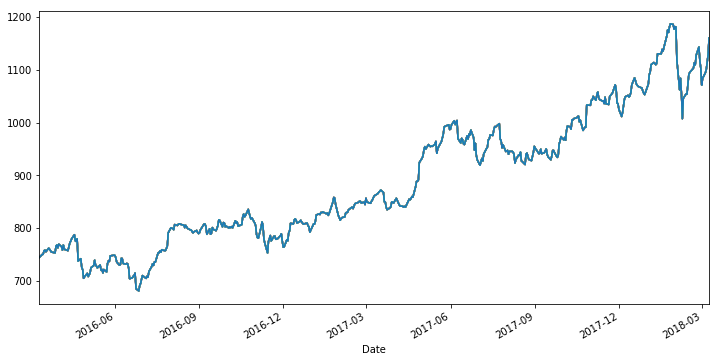

In [21]:
import matplotlib.pyplot as plt
otg.plot(figsize=(12,6))
plt.show()

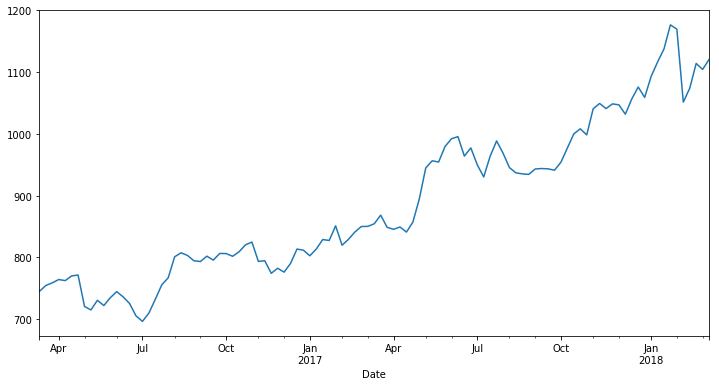

In [23]:
otg = otg.resample('W').mean()
otg.plot(figsize=(12,6))
plt.show()

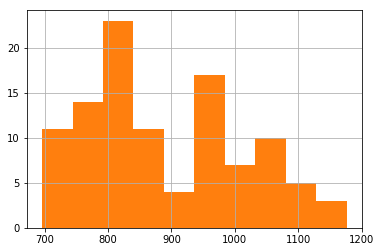

In [25]:
otg.hist()
plt.show()

In [26]:
itog = otg.describe()
itog

count     105.000000
mean      886.776183
std       124.527295
min       696.274011
25%       793.417993
50%       849.085986
75%       977.102002
max      1176.264038
Name: Adj Close, dtype: float64

In [29]:
import numpy as np
row =  [u'JB', u'p-value', u'skew', u'kurtosis']
#тест Харки — Бера
jb_test = sm.stats.stattools.jarque_bera(otg)
a = np.vstack([jb_test])
itog = SimpleTable(a, row)
itog


JB,p-value,skew,kurtosis
7.20727924264,0.0272244552018,0.468257970267,2.12232351876


In [36]:
#обобщенный тест Дикки-Фуллера
test = sm.tsa.adfuller(otg)
print("adf: ",test[0])
print("p-value: ",test[1])
print("Critical values: ",test[4])
if test[0]> test[4]['5%']: 
    print("есть единичные корни, ряд не стационарен")
else:
    print("единичных корней нет, ряд стационарен")

adf:  0.0759163333792
p-value:  0.96437779896
Critical values:  {'1%': -3.4961490537199116, '5%': -2.8903209639580556, '10%': -2.5821223452518263}
есть единичные корни, ряд не стационарен


In [37]:
otg1diff = otg.diff(periods=1).dropna()

In [38]:
test = sm.tsa.adfuller(otg1diff)
print("adf: ",test[0])
print("p-value: ",test[1])
print("Critical values: ",test[4])
if test[0]> test[4]['5%']: 
    print("есть единичные корни, ряд не стационарен")
else:
    print("единичных корней нет, ряд стационарен")

adf:  -8.56391003083
p-value:  8.54822081996e-14
Critical values:  {'1%': -3.4961490537199116, '5%': -2.8903209639580556, '10%': -2.5821223452518263}
единичных корней нет, ряд стационарен


In [39]:
#Высокое p-value => нулевая гипотеза о равенстве средних верна => стационарностm ряда
m = otg1diff.index[len(otg1diff.index)/2+1]
r1 = sm.stats.DescrStatsW(otg1diff[m:])
r2 = sm.stats.DescrStatsW(otg1diff[:m])
print("p-value: ", sm.stats.CompareMeans(r1,r2).ttest_ind()[1])

ValueError: 

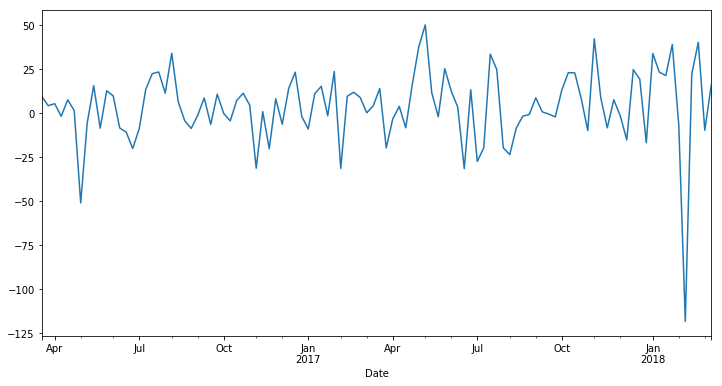

In [40]:
otg1diff.plot(figsize=(12,6))
plt.show()

In [43]:
ig = plt.figure(figsize=(12,8))
plt.subplot(2,1,1)
fig = sm.graphics.tsa.plot_acf(otg1diff.values.squeeze(), lags=25, ax=ax1)
plt.subplot(2,1,2)
fig = sm.graphics.tsa.plot_pacf(otg1diff, lags=25, ax=ax2)
plt.show()

NameError: name 'ax1' is not defined

In [79]:
src_data_model = otg[:'2017-03-12']
model = sm.tsa.ARIMA(src_data_model).fit(full_output=False, disp=0)
model.summary()

TypeError: __new__() missing 1 required positional argument: 'order'

In [59]:
q_test = sm.tsa.stattools.acf(model.resid, qstat=True) #свойство resid, хранит остатки модели, qstat=True, означает что применяем указынный тест к коэф-ам
DataFrame({'Q-stat':q_test[1], 'p-value':q_test[2]})

,Q-stat,p-value
0,0.011028,0.916363
1,0.013628,0.993209
2,0.055848,0.996548
3,1.212364,0.876059
4,2.399418,0.791561
5,2.790091,0.834694
6,2.878977,0.895968
7,2.951804,0.937346
8,4.575343,0.869646
9,5.219622,0.876032


In [77]:
pred = model.predict('2017-03-14','2018-03-09',typ='levels')
#trn = otg['2017-03-13':]
#r2 = r2_score(trn, pred[1:251])
#print('R^2: %1.2f' % r2)

ValueError: date 2017-03-14 00:00:00 not in date index. Try giving a date that is in the dates index or use an integer